In [ ]:
pip install tensorflow matplotlib tensorflow-datasets ipywidgets

In [ ]:
import tensorflow_datasets as tfds

import  matplotlib.pyplot as plt

In [ ]:
ds=tfds.load("fashion_mnist", split="train")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete56O4KJ/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete56O4KJ/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
ds.as_numpy_iterator().next()['label']

2

In [ ]:
import numpy as np

In [ ]:
dataiterator=ds.as_numpy_iterator()

In [ ]:
dataiterator.next()['label']

9

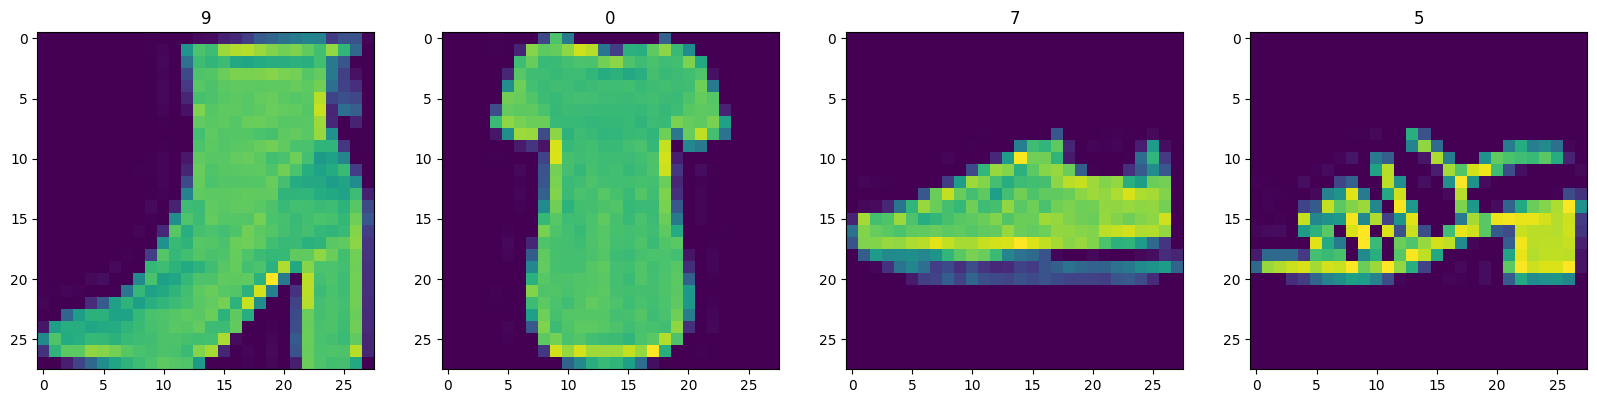

In [ ]:
fig, ax=plt.subplots(ncols=4, figsize=(20, 20))

for idx in range(4):
  sample=dataiterator.next()
  ax[idx].imshow(sample['image'])
  ax[idx].title.set_text(sample['label'])

In [ ]:
def scale_images(data):
  image=data['image']

  return image/255

In [ ]:
ds=tfds.load("fashion_mnist", split='train')

ds=ds.map(scale_images)

ds=ds.cache()

ds=ds.shuffle(60000)

ds=ds.batch(128)

ds=ds.prefetch(64)

In [ ]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

In [ ]:
def build_generator():
  model=Sequential()

  model.add(Dense(7*7*128, input_dim=128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7, 7, 128)))

  model.add(UpSampling2D())
  model.add(Conv2D(128, 5, padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(UpSampling2D())
  model.add(Conv2D(128, 5, padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(128, 4, padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(128, 4, padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(128, 3, padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(128, 3, padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(1, 3, padding="same", activation='sigmoid'))

  return model

In [ ]:
generator=build_generator()

generator.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 6272)              809088    
                                                                 
 leaky_re_lu_34 (LeakyReLU)  (None, 6272)              0         
                                                                 
 reshape_7 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_11 (UpSampli  (None, 14, 14, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_54 (Conv2D)          (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_35 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                     

In [ ]:
img=generator.predict(np.random.randn(4, 128, 1))

1/1 [==============================] - 2s 2s/step


In [ ]:
x=np.random.randn(4, 128, 1)
x.shape

(4, 128, 1)

In [ ]:
x

In [ ]:
img.shape

(4, 28, 28, 1)

In [ ]:
img[0].shape

(28, 28, 1)

In [ ]:
np.squeeze(img[0]).shape

(28, 28)

1/1 [==============================] - 0s 17ms/step


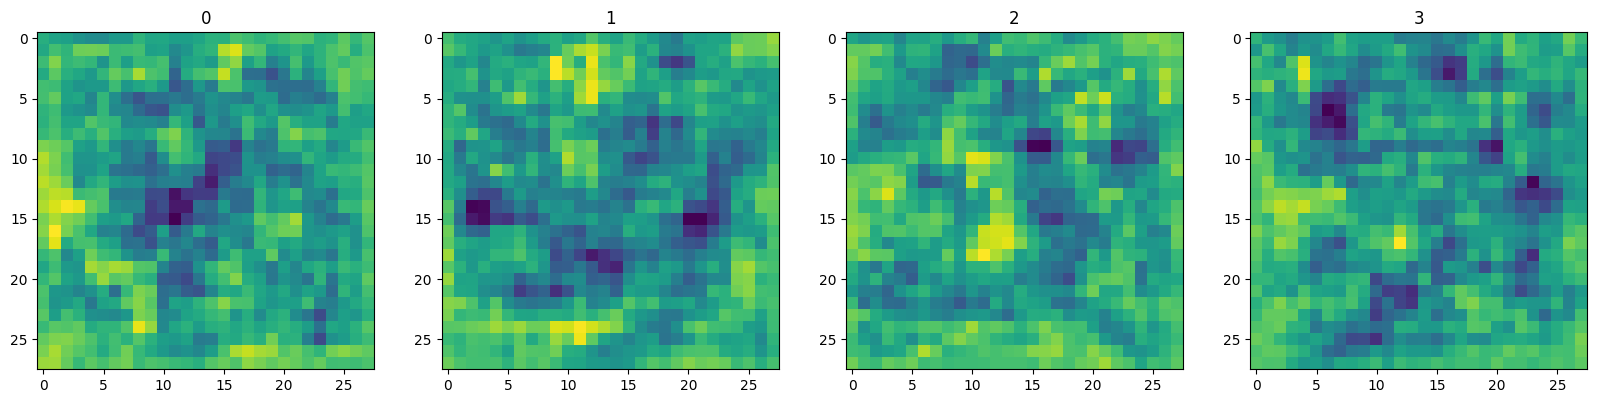

In [ ]:
img=generator.predict(np.random.randn(4, 128, 1))

fig, ax=plt.subplots(ncols=4, figsize=(20, 20))
for idx in range(4):
  ax[idx].imshow(img[idx])
  ax[idx].title.set_text(idx)

In [ ]:
def build_discriminator():
  model=Sequential()

  model.add(Conv2D(16, 5, input_shape=(28, 28, 1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(32, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(64, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(128, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(256, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(512, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Flatten())
  model.add(Dropout(0.4))

  model.add(Dense(1, activation='sigmoid'))



  return model

In [ ]:
discriminator=build_discriminator()

discriminator.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 24, 24, 16)        416       
                                                                 
 leaky_re_lu_28 (LeakyReLU)  (None, 24, 24, 16)        0         
                                                                 
 dropout_24 (Dropout)        (None, 24, 24, 16)        0         
                                                                 
 conv2d_49 (Conv2D)          (None, 20, 20, 32)        12832     
                                                                 
 leaky_re_lu_29 (LeakyReLU)  (None, 20, 20, 32)        0         
                                                                 
 dropout_25 (Dropout)        (None, 20, 20, 32)        0         
                                                                 
 conv2d_50 (Conv2D)          (None, 16, 16, 64)      

In [ ]:
img.shape

(4, 28, 28, 1)

In [ ]:
discriminator.predict(img)

1/1 [==============================] - 1s 833ms/step


array([[0.49570712],
       [0.49567956],
       [0.4957144 ],
       [0.49572027]], dtype=float32)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [ ]:
g_opt=Adam(learning_rate=0.0001)
d_opt=Adam(learning_rate=0.00001)
g_loss=BinaryCrossentropy()
d_loss=BinaryCrossentropy()

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
tf.random.normal((128, 128, 1))

<tf.Tensor: shape=(128, 128, 1), dtype=float32, numpy=
array([[[-2.3476954 ],
        [ 1.3881081 ],
        [-0.05597954],
        ...,
        [-0.32064202],
        [-0.19989786],
        [-0.0752169 ]],

       [[ 0.72899437],
        [ 0.67803574],
        [-1.3350221 ],
        ...,
        [-0.4458233 ],
        [ 1.3545281 ],
        [-0.09764565]],

       [[ 2.6131175 ],
        [ 1.3724122 ],
        [-1.5857347 ],
        ...,
        [-0.2847328 ],
        [-0.20076276],
        [-0.7583453 ]],

       ...,

       [[-0.2967682 ],
        [-0.8901321 ],
        [ 1.7486753 ],
        ...,
        [-1.552451  ],
        [ 0.01160339],
        [ 1.3258437 ]],

       [[-2.0930715 ],
        [-0.6122964 ],
        [ 0.7338559 ],
        ...,
        [ 0.8410381 ],
        [-0.34676147],
        [-1.0889623 ]],

       [[ 1.0300581 ],
        [ 0.11573887],
        [ 0.39921743],
        ...,
        [ 0.82294846],
        [ 0.04206276],
        [ 1.5171767 ]]], dtype=float32)

In [ ]:
class FashionGAN(Model):
  def __init__(self, generator, discriminator, *args, **kwargs):
    super().__init__(*args, **kwargs)

    self.generator=generator
    self.discriminator=discriminator

  def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
    super().compile(*args, **kwargs)

    self.g_opt=g_opt
    self.d_opt=d_opt
    self.g_loss=g_loss
    self.d_loss=d_loss

  def train_step(self, batch):
    real_images=batch
    fake_images=self.generator(tf.random.normal((128, 128, 1)), training=False)

    with tf.GradientTape() as d_tape:
      yhat_real=self.discriminator(real_images, training=True)
      yhat_fake=self.discriminator(fake_images, training=True)

      yhat_realfake=tf.concat([yhat_real, yhat_fake], axis=0)
      y_realfake=tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)

      noise_real=0.15*tf.random.uniform(tf.shape(yhat_real))
      noise_fake=-0.15*tf.random.uniform(tf.shape(yhat_fake))
      y_realfake+=tf.concat([noise_real, noise_fake], axis=0)

      total_d_loss=self.d_loss(y_realfake, yhat_realfake)

    dgrad=d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
    self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))


    with tf.GradientTape() as g_tape:
      gen_images=self.generator(tf.random.normal((128, 128, 1)), training=True)

      predicted_labels=self.discriminator(gen_images, training=False)

      total_g_loss=self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)

    ggrad=g_tape.gradient(total_g_loss, self.generator.trainable_variables)
    self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))

    return {'g_loss': total_g_loss, 'd_loss': total_d_loss}

In [ ]:
fashgan=FashionGAN(generator, discriminator)

In [ ]:
fashgan.compile(g_opt, d_opt, g_loss, d_loss)

In [ ]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [ ]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))

In [ ]:
hist = fashgan.fit(ds, epochs=2, callbacks=[ModelMonitor()])

Epoch 1/2
  6/469 [..............................] - ETA: 1:39 - g_loss: 2.6739 - d_loss: 0.2856

469/469 [==============================] - ETA: 0s - g_loss: 2.8057 - d_loss: 0.2773

FileNotFoundError: [Errno 2] No such file or directory: 'images/generated_img_0_0.png'

<built-in function getcwd>
